In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%config Completer.use_jedi = False

In [3]:
df=pd.read_csv('pca_train.csv')

In [4]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38706,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8899,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30333,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4667,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

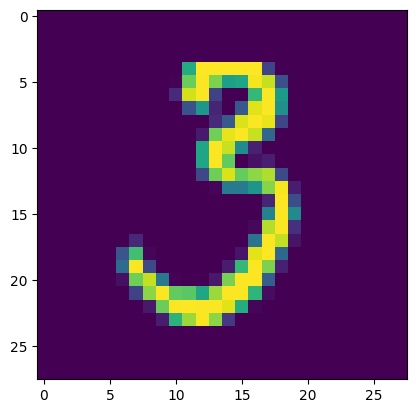

In [6]:
plt.imshow(df.iloc[9247,1:].values.reshape(28,28))

In [7]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [8]:
X.sample(5)
X.shape

(42000, 784)

In [9]:
Y.sample(5)

34944    7
34344    4
27234    0
7649     1
25785    7
Name: label, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
X_train.shape

(33600, 784)

In [13]:
y_train.shape

(33600,)

In [14]:
y_train.sample(5)

12363    7
19714    2
35429    8
6218     2
17841    3
Name: label, dtype: int64

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [29]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [76]:
i=300
pca=PCA(n_components=i)
X_train_new=X_train.copy()
X_test_new=X_test.copy()
X_train_new = pca.fit_transform(X_train_new)
X_test_new = pca.transform(X_test_new)
knn.fit(X_train_new,y_train)
y_pred_new=knn.predict(X_test_new)
accuracy_score(y_test,y_pred_new)

0.9664285714285714

In [56]:
accuracy=[]
for i in range(1,784):
    pca=PCA(n_components=i)
    X_train_new = pca.fit_transform(X_train)
    X_test_new = pca.transform(X_test)
    knn.fit(X_train_new,y_train)
    y_pred_new=knn.predict(X_test_new)
    accuracy.append(accuracy_score(y_test,y_pred_new))

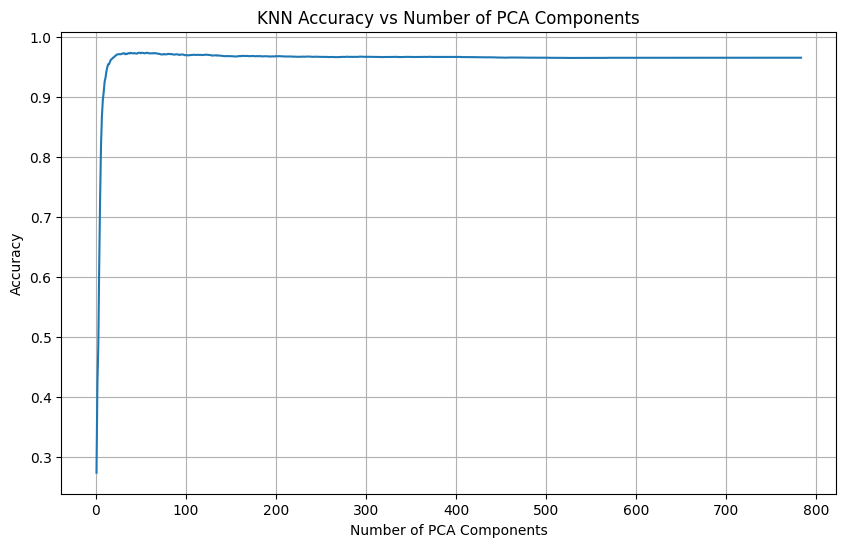

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(accuracy)+1), accuracy)
plt.title("KNN Accuracy vs Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [80]:
ev=np.cumsum(pca.explained_variance_ratio_)

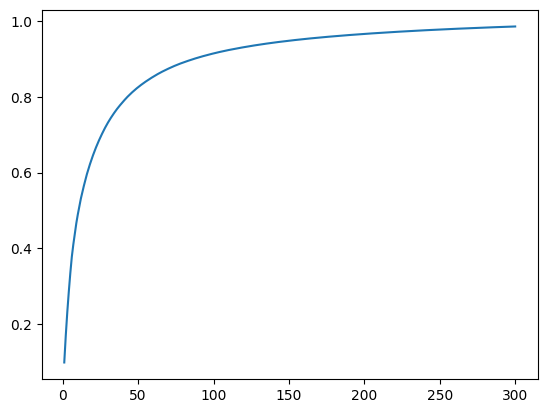

In [81]:
plt.plot(range(1,len(ep)+1),ep)